Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 11, 64)       640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 6, 64)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 64, 6, 64)        256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 4, 128)        73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 2, 128)       0         
 2D)                                                             
                                                      

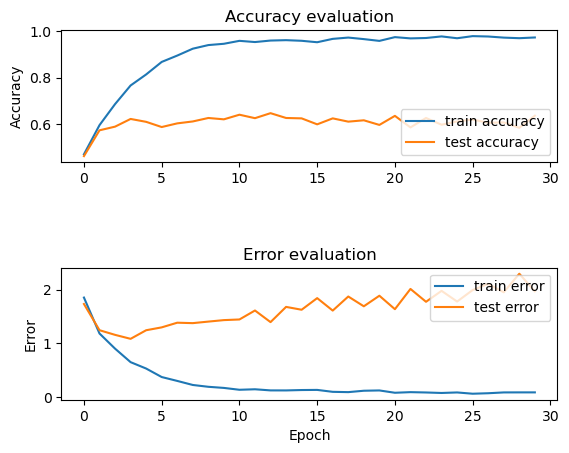

63/63 - 1s - loss: 1.9851 - accuracy: 0.6320 - 1s/epoch - 23ms/step

Test accuracy: 0.6320000290870667
63/63 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       243
           1       0.62      0.48      0.54       248
           2       0.80      0.92      0.86       249
           3       0.58      0.30      0.40       231
           4       0.78      0.92      0.84       256
           5       0.78      0.75      0.77       263
           6       0.39      0.52      0.45       263
           7       0.53      0.56      0.55       247

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.62      2000
weighted avg       0.63      0.63      0.62      2000



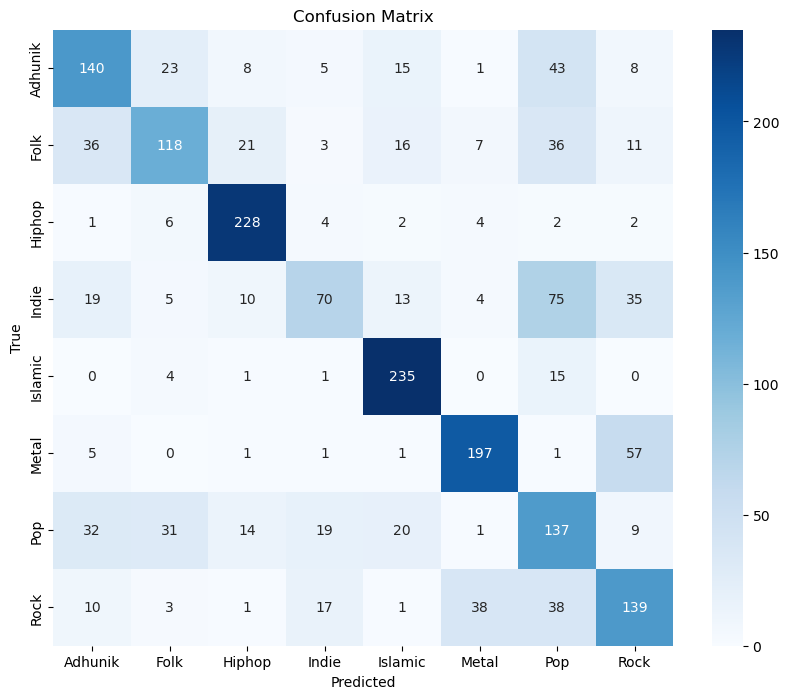

In [3]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

DATA_PATH = r"C:\Users\Asus\Desktop\Music-Genre-Classification\data_10.json"

def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y



def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error evaluation")
    
    plt.subplots_adjust(hspace=0.8)

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test



def build_model(input_shape):
    model = keras.Sequential()

    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(256, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

def main():
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    optimiser = keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    plot_history(history)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # Pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # Predict sample
    #predict(model, X_to_predict, y_to_predict)
    
    genre_names = [
    "Adhunik", "Folk", "Hiphop", "Indie", 
    "Islamic", "Metal", "Pop", "Rock"
    ]
    
    
    # Generate predictions for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Generate classification report
    print(classification_report(y_test, y_pred_classes))

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=genre_names, yticklabels=genre_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
pip show keras